#### Roll NO : 31444

#### Assignment : 5

#### Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall
on the given dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [7]:
data["Purchased"]=  data["Purchased"].astype('bool')

In [8]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased            bool
dtype: object

In [9]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

print(X[:3, :])
print('-'*15)
print(y[:3])

[[   19 19000]
 [   35 20000]
 [   26 43000]]
---------------
[False False False]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train[:3])
print('-'*15)
print(y_train[:3])
print('-'*15)
print(X_test[:3])
print('-'*15)
print(y_test[:3])


[[    58 144000]
 [    59  83000]
 [    24  55000]]
---------------
[ True False False]
---------------
[[   30 87000]
 [   38 50000]
 [   35 75000]]
---------------
[False False False]


In [11]:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [13]:
r2score = classifier.score(X_test,y_test)
print("R2Score : "+str(r2score*100)+"%")

R2Score : 92.5%


#### Confusion Matrix

[Text(0.5, 15.0, 'Predicted'), Text(33.0, 0.5, 'Actual')]

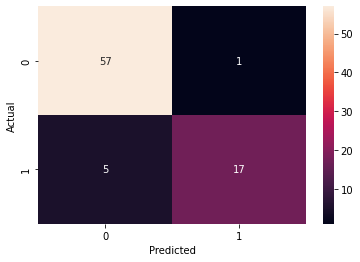

In [14]:

cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm,annot=True).set(xlabel='Predicted', ylabel='Actual')


In [15]:
tn = cm[0][0]
tp = cm[1][1]
fn = cm[1][0]
fp = cm[0][1]

In [16]:
print("Precision  : ",tp/(tp+fp)*100,"%")
print("Recall     : ",tp/(tp+fn)*100,"%")
print("Error Rate : ",(fn+fp)/(fn+fp+tn+tp)*100,"%")
print("Accuracy   : ",(tp+tn)/(tp+tn+fp+fn)*100,"%")

Precision  :  94.44444444444444 %
Recall     :  77.27272727272727 %
Error Rate :  7.5 %
Accuracy   :  92.5 %


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


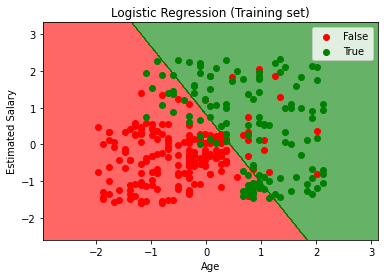

In [17]:

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


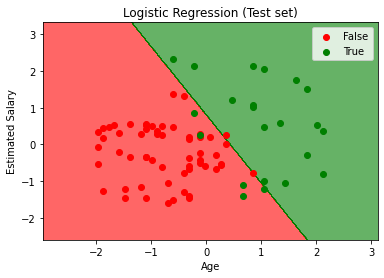

In [18]:

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()